In [51]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import numpy as np
from sklearn.preprocessing import LabelBinarizer

## Read the data

In [52]:

pima = pd.read_csv("./csv/titanic.csv")


In [53]:
pima.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_Size
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,Mr,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Mrs,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,Miss,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Mrs,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,Mr,0


## Feature selection
Un feature relevant este cel de Title. 

Acesta are 6 vlaori distincte si este reprezentat printr-un string (Mr, Miss, Mr, Mrs, Master, Dr). 

Pentru transformare acestui feature in valori numerice foloses un labelBinarizer. Acesta va genera o martice de 6xlen(df) valori. Fiecare linie contine feature-ul transformat intr-o insirurire de 0 si 1. Exista doar un singur 1 pe linie si pozitia acestia corespunde cu Titlul pe care il inlocuieste.

La final concatenam matricea in care am encodat feature-ul de Title cu dataframe-ul

In [54]:
feature_cols = ['Age', 'Fare', 'Sex','Family_Size']
pima["Sex"] = np.where(pima["Sex"] == "female", 1, 0)
encoder = LabelBinarizer()

title = encoder.fit_transform(pima["Title"])
print(encoder.classes_)
title = pd.DataFrame(title)
title.columns = encoder.classes_
 
X= pd.concat([pima[feature_cols], title], axis=1) # Features

y = pima["Survived"] # Target variable



['Dr' 'Master' 'Miss' 'Mr' 'Mrs' 'Rev']


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [58]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7798507462686567


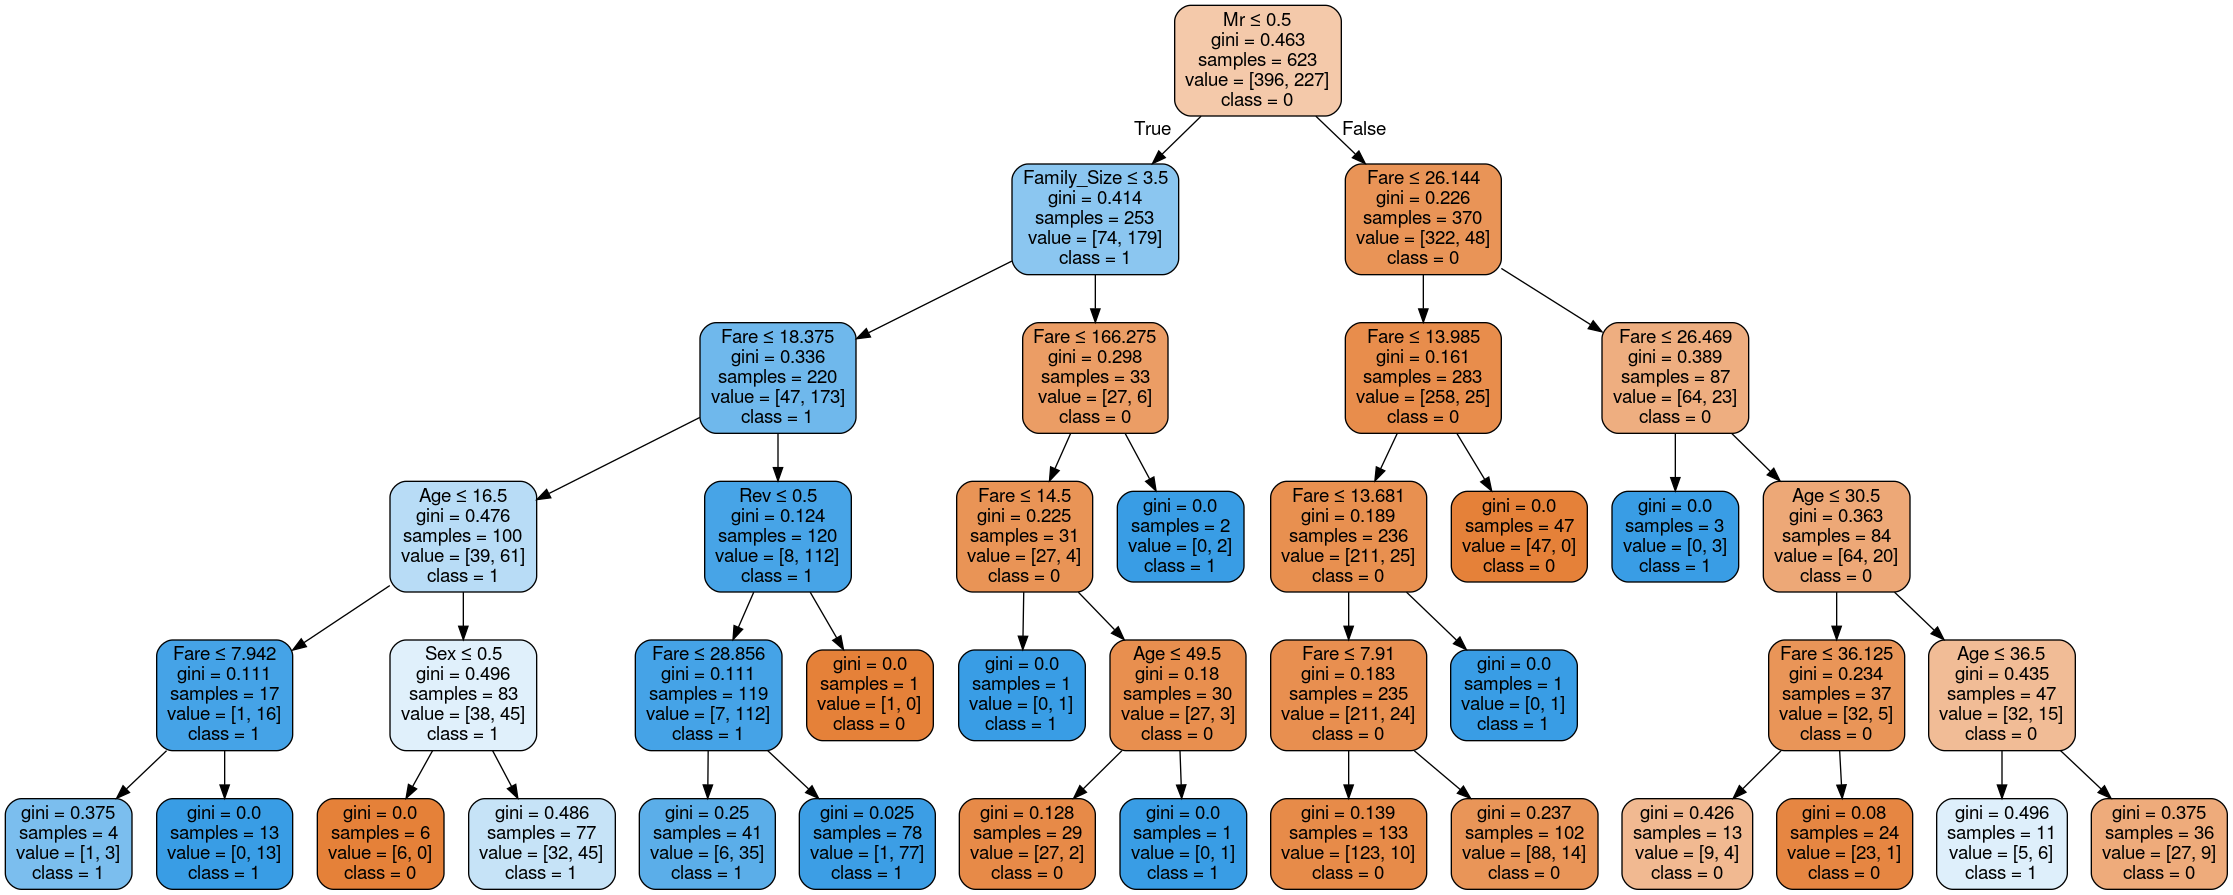

In [59]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = np.array(X.columns),class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('titanic.png')
Image(graph.create_png())
